In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [6]:
data=pd.read_csv('D:\Praktikum\Training.csv')
data.head()

,Id,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,AA1,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,AA2,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,AA3,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,AA4,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,AA5,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [8]:
LE=LabelEncoder()
data.Gender=LE.fit_transform(data.Gender)
data.tail()

,Id,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
244,AA245,39,1,0.6,0.2,188,28,43,8.1,3.3,0.6,1
245,AA246,58,0,0.7,0.1,172,27,22,6.7,3.2,0.9,1
246,AA247,60,0,1.4,0.7,159,10,12,4.9,2.5,1.0,2
247,AA248,34,1,3.7,2.1,490,115,91,6.5,2.8,0.7,1
248,AA249,50,1,0.8,0.2,152,29,30,7.4,4.1,1.3,1


In [9]:
data["Dataset"]=data["Dataset"].replace(1,0).replace(2,1)

In [11]:
data.tail()

,Id,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
244,AA245,39,1,0.6,0.2,188,28,43,8.1,3.3,0.6,0
245,AA246,58,0,0.7,0.1,172,27,22,6.7,3.2,0.9,0
246,AA247,60,0,1.4,0.7,159,10,12,4.9,2.5,1.0,1
247,AA248,34,1,3.7,2.1,490,115,91,6.5,2.8,0.7,0
248,AA249,50,1,0.8,0.2,152,29,30,7.4,4.1,1.3,0


In [12]:
data.isnull().sum()

Id                            0
Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    1
Dataset                       0
dtype: int64

In [13]:
data['Albumin_and_Globulin_Ratio']=data['Albumin_and_Globulin_Ratio'].fillna(data['Albumin_and_Globulin_Ratio'].mean())

In [15]:
x=data.drop(['Id','Dataset'],axis=1)
x.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40


In [16]:
y=data['Dataset']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Dataset, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=None, shuffle=False)

In [23]:
x_t=data.drop(['Dataset'],axis=1)
y_t=data['Id']
x_train_t, x_test_t, y_train_t, y_test_t= train_test_split(x_t,y_t,test_size=0.25,random_state=None, shuffle=False)

In [35]:
#logistik Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,roc_curve,auc,confusion_matrix

In [44]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)
acc_logreg=round(accuracy_score(y_test, y_pred)*100,2)
print(acc_logreg)

63.49


C:\Users\Windows 8.1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
auc_score=round(roc_auc_score(y_test,y_pred,average='micro')*100,2)
auc_score

55.77

In [31]:
f1=round(f1_score(y_test,y_pred,average='micro')*100,2)
f1

63.49

In [32]:
import matplotlib.pyplot as plt

In [36]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[37,  0],
       [23,  3]], dtype=int64)

In [37]:
import seaborn as sns

Text(91.68, 0.5, 'predicted label')

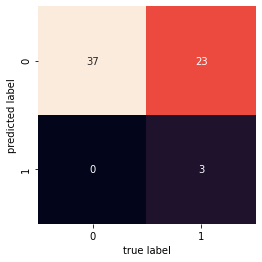

In [38]:
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

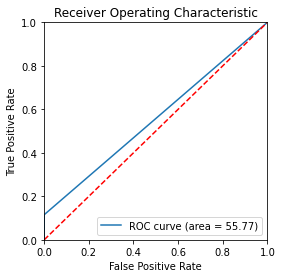

In [39]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize = [4,4])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.show()

In [40]:
data2=pd.read_csv('D:\Praktikum\Training.csv')
data.head()

,Id,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,AA1,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,AA2,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,0
2,AA3,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,0
3,AA4,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,0
4,AA5,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,0


In [42]:
#set the output as a datafarme and convert to csv file
output=pd.DataFrame({'Id':y_test_t,'Dataset':y_pred})
output.to_csv('D:\Praktikum\Out_Training.csv', index=False)